In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [259]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [415]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [430]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [586]:
pip install scipy.special

ERROR: Could not find a version that satisfies the requirement scipy.special (from versions: none)
ERROR: No matching distribution found for scipy.special
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os

In [599]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import random

from scipy.stats import stats

#from scipy.special import inv_boxcox


from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, RidgeCV, ElasticNetCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
#from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, 
#accuracy_score, roc_curve, roc_auc_score, plot_confusion_matrix, plot_roc_curve,

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

In [278]:
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay

In [488]:
#Models
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.layers import Conv1D, Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier


#Callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [7]:
from sklearn.metrics import mean_absolute_error, classification_report

In [8]:
import sklearn.metrics

In [411]:
df = pd.read_csv('/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/project-capstone/all_merged.csv')

In [448]:
df.describe()

,Unnamed: 0,zipyear,ppu,price_transformed
count,2.199949e+06,2.199949e+06,2.199949e+06,2.199949e+06
mean,2.202756e+05,1.070292e+08,7.574627e+05,3.206827e+00
std,1.273359e+05,5.627142e+06,7.225106e+05,1.225289e-02
min,0.000000e+00,1.000120e+08,1.381628e+05,3.177779e+00
25%,1.100600e+05,1.003420e+08,3.454377e+05,3.199062e+00
50%,2.201410e+05,1.046820e+08,5.125945e+05,3.206541e+00
75%,3.302290e+05,1.122520e+08,9.401560e+05,3.216409e+00
max,4.457560e+05,1.169720e+08,5.171098e+06,3.236069e+00


<AxesSubplot: xlabel='ppu', ylabel='Count'>

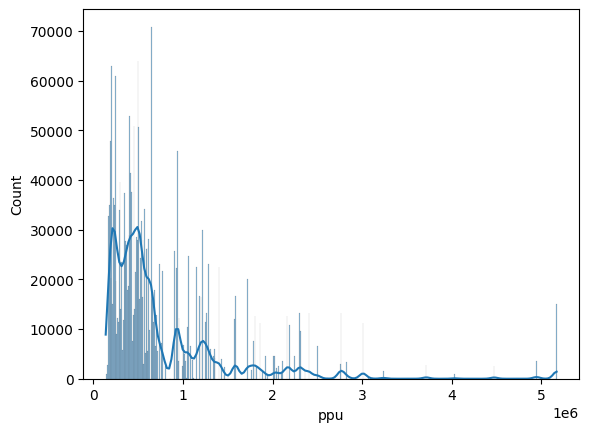

In [422]:
sns.histplot(data=df, x='ppu', kde=True)

In [420]:
df['ppu'].skew()

2.955702132214392

In [423]:
price_log = np.log(df['ppu'])
price_log.skew()

0.5406546769192928

<AxesSubplot: xlabel='ppu', ylabel='Count'>

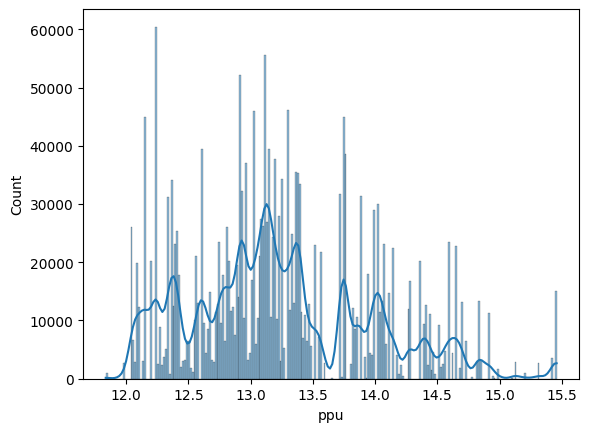

In [429]:
sns.histplot(data=price_log, kde=True)

In [426]:
price_sqrt = np.sqrt(df['ppu'])
price_sqrt.skew()

1.5526436080049384

<AxesSubplot: xlabel='ppu', ylabel='Count'>

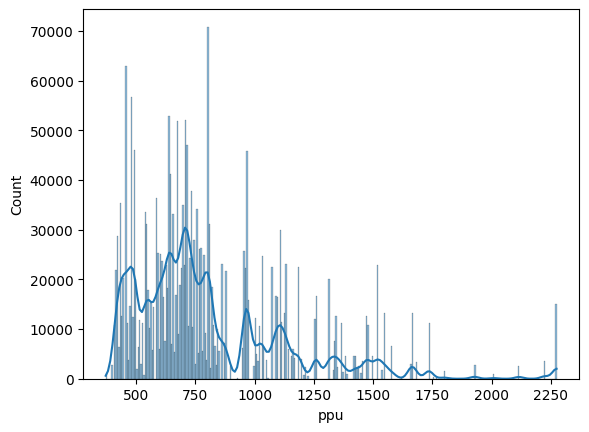

In [428]:
sns.histplot(data=price_sqrt, kde=True)

In [605]:
import scipy.stats as scs

In [607]:
# Transformation Box-Cox
price_boxbox, lam = scs.boxcox(df['ppu'])
pd.Series(price_boxcox).skew()

In [608]:
lam

-0.3063029811540361

In [609]:
pd.Series(price_boxcox).skew()

0.046371716391781954

In [601]:
price_boxcox = boxcox(df['ppu'])[0]
pd.Series(price_boxcox).skew()

TypeError: boxcox() takes from 2 to 3 positional arguments but 1 were given

<AxesSubplot: ylabel='Count'>

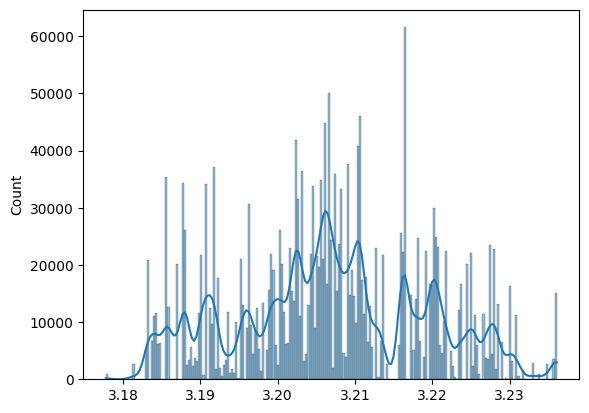

In [436]:
sns.histplot(data=price_boxcox, kde=True)

In [201]:
#df['price_median'] = ['high' if x >= median else 'low' for x in df.ppu]

In [437]:
df['price_transformed'] = price_boxcox

In [452]:
df['multi'] = pd.qcut(df['ppu'], q=4, labels=[1, 2, 3, 4])

In [453]:
df['multi_transformed'] = pd.qcut(df['price_transformed'], q=4, labels=[1, 2, 3, 4])

In [458]:
df

,Unnamed: 0,descriptor,complaint_type,zipyear,ppu,price_transformed,multi,multi_transformed
0,0,Loud Music/Party,Noise - Residential,104632016,3.407297e+05,3.198785,1,1
1,1,Loud Music/Party,Noise - Residential,100402016,5.457485e+05,3.207647,3,3
2,2,Loud Talking,Noise - Residential,100122016,3.715735e+06,3.233015,4,4
3,3,Loud Music/Party,Noise - Residential,111042016,3.813583e+05,3.201022,2,2
4,4,Loud Music/Party,Noise - Residential,100322016,5.006615e+05,3.206119,2,2
...,...,...,...,...,...,...,...,...
2199944,445752,Loud Music/Party,Noise - Residential,104582017,2.442623e+05,3.191706,1,1
2199945,445753,Loud Music/Party,Noise - Residential,116912017,3.044278e+05,3.196470,1,1
2199946,445754,Banging/Pounding,Noise - Residential,112142017,4.793599e+05,3.205333,2,2
2199947,445755,Loud Music/Party,Noise - Residential,100402017,5.692389e+05,3.208380,3,3


In [446]:
df[df['multi']==1].ppu.describe()

count    551544.000000
mean     241258.979326
std       49959.705411
min      138162.769231
25%      197887.432576
50%      233173.156536
75%      287960.537618
max      345437.739864
Name: ppu, dtype: float64

In [457]:
df[df['multi_transformed']==1].ppu.describe()

count    551544.000000
mean     241258.979326
std       49959.705411
min      138162.769231
25%      197887.432576
50%      233173.156536
75%      287960.537618
max      345437.739864
Name: ppu, dtype: float64

In [447]:
df[df['multi']==2].ppu.describe()

count    571171.000000
mean     435914.999732
std       51381.247965
min      345883.048980
25%      394530.209402
50%      427343.399025
75%      483860.053909
max      512594.499196
Name: ppu, dtype: float64

In [449]:
df[df['multi']==3].ppu.describe()

count    544814.000000
mean     665346.306393
std      124318.046934
min      514140.350106
25%      569238.928476
50%      640645.621323
75%      718930.671025
max      940156.007662
Name: ppu, dtype: float64

In [450]:
df[df['multi']==4].ppu.describe()

count    5.324200e+05
mean     1.731420e+06
std      8.896743e+05
min      9.412781e+05
25%      1.184146e+06
50%      1.399992e+06
75%      2.115221e+06
max      5.171098e+06
Name: ppu, dtype: float64

<AxesSubplot: xlabel='multi', ylabel='Count'>

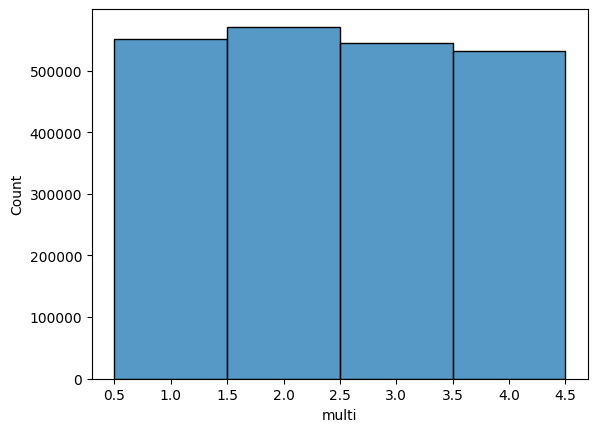

In [442]:
sns.histplot(df['multi'])

<AxesSubplot: xlabel='multi_transformed', ylabel='Count'>

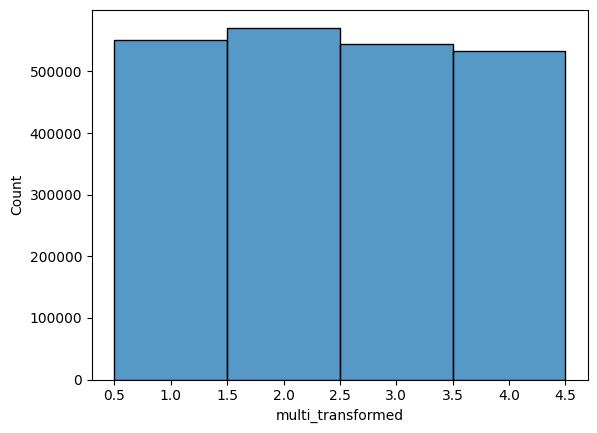

In [455]:
sns.histplot(df['multi_transformed'])

In [203]:
df.drop(columns=['ppu', 'zipyear',], inplace=True)

,Unnamed: 0,descriptor,complaint_type,multi
0,0,Loud Music/Party,Noise - Residential,1
1,1,Loud Music/Party,Noise - Residential,3
2,2,Loud Talking,Noise - Residential,4
3,3,Loud Music/Party,Noise - Residential,2
4,4,Loud Music/Party,Noise - Residential,2
...,...,...,...,...
2199944,445752,Loud Music/Party,Noise - Residential,1
2199945,445753,Loud Music/Party,Noise - Residential,1
2199946,445754,Banging/Pounding,Noise - Residential,2
2199947,445755,Loud Music/Party,Noise - Residential,3


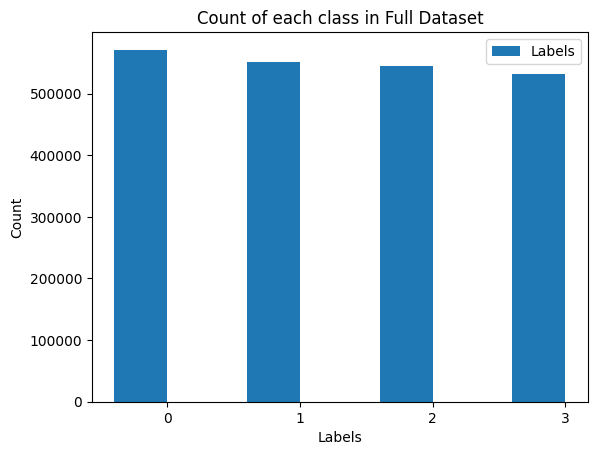

In [376]:
df


X = range(4)

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, df['multi'].value_counts(), 0.4, label = 'Labels')
  
plt.xticks(X_axis, X)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Count of each class in Full Dataset")
plt.legend()
plt.show()

Run basic regression model with Keras and transformed target


In [460]:
r = df.copy()

In [463]:
#Dummify Features
r = pd.get_dummies(r, columns = ['descriptor', 'complaint_type'], drop_first=True)

In [465]:
#Drop unnecessary columns
#r.drop(columns=['Unnamed: 0', 'zipyear', 'ppu', 'multi', 'multi_transformed'], inplace=True)

In [474]:
#Make the train/test split
train_dataset = r.sample(frac=0.8, random_state=0)
test_dataset = r.drop(train_dataset.index)

In [475]:
train_dataset.shape

(1759959, 35)

In [476]:
test_dataset.shape

(439990, 35)

In [477]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price_transformed,1759959.0,3.206830e+00,0.012258,3.177779,3.199062,3.206541,3.216409,3.236069
descriptor_Banging/Pounding,1759959.0,1.497745e-01,0.356850,0.000000,0.000000,0.000000,0.000000,1.000000
descriptor_Car/Truck Horn,1759959.0,1.586457e-02,0.124952,0.000000,0.000000,0.000000,0.000000,1.000000
descriptor_Car/Truck Music,1759959.0,3.695086e-02,0.188641,0.000000,0.000000,0.000000,0.000000,1.000000
descriptor_Engine Idling,1759959.0,1.597708e-02,0.125387,0.000000,0.000000,0.000000,0.000000,1.000000
descriptor_Loud Music/Party,1759959.0,5.410012e-01,0.498316,0.000000,0.000000,1.000000,1.000000,1.000000
descriptor_Loud Talking,1759959.0,9.393401e-02,0.291737,0.000000,0.000000,0.000000,0.000000,1.000000
descriptor_Loud Television,1759959.0,9.324081e-03,0.096110,0.000000,0.000000,0.000000,0.000000,1.000000
descriptor_NYPD,1759959.0,2.897795e-04,0.017020,0.000000,0.000000,0.000000,0.000000,1.000000
descriptor_News Gathering,1759959.0,1.954591e-04,0.013979,0.000000,0.000000,0.000000,0.000000,1.000000


In [478]:
#Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price_transformed')
test_labels = test_features.pop('price_transformed')

In [480]:
#Normalize features. Add with keras layer
normalizer = tf.keras.layers.Normalization(axis=-1)

In [481]:
#Fit state of the preprocessing layer
normalizer.adapt(np.array(train_features))

In [482]:
print(normalizer.mean.numpy())

[[1.4977278e-01 1.5865022e-02 3.6951452e-02 1.5976904e-02 5.4099590e-01
  9.3933143e-02 9.3240952e-03 2.8977889e-04 1.9546009e-04 1.5620806e-02
  3.5068290e-03 3.2273968e-04 1.2051101e-03 8.9723133e-03 5.0171796e-04
  6.1448973e-02 1.9832760e-02 8.3005978e-03 7.9549400e-06 2.7842041e-05
  8.5057435e-04 2.9546178e-05 3.1047598e-03 5.6820562e-07 1.0616146e-02
  1.9012112e-03 1.3434242e-01 1.0829207e-01 2.3864431e-03 2.0813716e-03
  9.9438801e-03 5.1836443e-01 1.5993455e-01 6.4210027e-02]]


In [483]:
#When the layer is called, it returns the input data, with each feature independently normalized:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

Normalized: [[-0.42  7.88 -0.2  -0.13 -1.09 -0.32 -0.1  -0.02 -0.01 -0.13 -0.06 -0.02
  -0.03 -0.1  -0.02 -0.26 -0.14 -0.09 -0.   -0.01 -0.03 -0.01 -0.06 -0.
  -0.1  -0.04 -0.39 -0.35 -0.05 -0.05 -0.1  -1.04 -0.44  3.82]]


In [497]:
# Make Callbacks
# Stop learning after 10 epochs if the loss value doesn't decrease
earlystop = EarlyStopping(patience=4)

# Reduce the learning rate by monitoring accuracy. If accuracy doesn't increase after 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='mean_absolute_error', 
                                            patience=2, 
                                            factor=0.5, 
                                            min_lr=0.00001)

checkpoint_path = "/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/NN-regression-callbacks/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='mean_absolute_error',
                                                 verbose = 1,
                                                 save_best_only = True,
                                                 mode = 'max')

callbacks = [earlystop, learning_rate_reduction, cp_callback]

Before DNN, try running with linear regression and using one and several variables
First, just do: Construction Before/After Hours

In [486]:
train_features.columns

Index(['descriptor_Banging/Pounding', 'descriptor_Car/Truck Horn',
       'descriptor_Car/Truck Music', 'descriptor_Engine Idling',
       'descriptor_Loud Music/Party', 'descriptor_Loud Talking',
       'descriptor_Loud Television', 'descriptor_NYPD',
       'descriptor_News Gathering', 'descriptor_Noise, Barking Dog (NR5)',
       'descriptor_Noise, Ice Cream Truck (NR4)',
       'descriptor_Noise, Other Animals (NR6)',
       'descriptor_Noise:  lawn care equipment (NCL)',
       'descriptor_Noise: Alarms (NR3)',
       'descriptor_Noise: Boat(Engine,Music,Etc) (NR10)',
       'descriptor_Noise: Construction Before/After Hours (NM1)',
       'descriptor_Noise: Construction Equipment (NC1)',
       'descriptor_Noise: Jack Hammering (NC2)',
       'descriptor_Noise: Loud Music/Daytime (Mark Date And Time) (NN1)',
       'descriptor_Noise: Loud Music/Nighttime(Mark Date And Time) (NP1)',
       'descriptor_Noise: Manufacturing Noise (NK1)',
       'descriptor_Noise: Other Noise Sources

In [ ]:
#First, create a NumPy array made of the 'Horsepower' features. 
#Then, instantiate the tf.keras.layers.Normalization
#fit its state to the horsepower data:

In [490]:
construction = np.array(train_features['descriptor_Noise: Construction Before/After Hours (NM1)'])
construction_normalizer = layers.Normalization(input_shape=[1,], axis=None)
construction_normalizer.adapt(construction)

In [491]:
#Build keras sequential model
construction_model = tf.keras.Sequential([
    construction_normalizer,
    layers.Dense(units=1)
])

construction_model.summary()


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_47 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [493]:
construction_model.predict(construction[:1000])

32/32 [==============================] - 0s 514us/step


array([[ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [-6.2824903],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [-6.2824903],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [-6.2824903],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.4113283],
       [ 0.41

In [494]:
#Compile with MAE
construction_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [500]:
%%time
history = construction_model.fit(
    train_features['descriptor_Noise: Construction Before/After Hours (NM1)'],
    train_labels,
    epochs=30,
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,)

Epoch 1/30
43999/43999 [==============================] - 25s 567us/step - loss: 0.0172 - val_loss: 0.0170
Epoch 2/30
43999/43999 [==============================] - 25s 576us/step - loss: 0.0172 - val_loss: 0.0159
Epoch 3/30
43999/43999 [==============================] - 25s 579us/step - loss: 0.0173 - val_loss: 0.0118
Epoch 4/30
43999/43999 [==============================] - 24s 548us/step - loss: 0.0171 - val_loss: 0.0114
Epoch 5/30
43999/43999 [==============================] - 25s 561us/step - loss: 0.0173 - val_loss: 0.0239
Epoch 6/30
43999/43999 [==============================] - 25s 558us/step - loss: 0.0174 - val_loss: 0.0155
Epoch 7/30
43999/43999 [==============================] - 25s 568us/step - loss: 0.0174 - val_loss: 0.0137
Epoch 8/30
43999/43999 [==============================] - 24s 555us/step - loss: 0.0172 - val_loss: 0.0182
Epoch 9/30
43999/43999 [==============================] - 24s 555us/step - loss: 0.0174 - val_loss: 0.0138
Epoch 10/30
43999/43999 [============

In [ ]:
#Visualize model's training progress

In [501]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
25,0.017321,0.027941,25
26,0.017538,0.010475,26
27,0.017385,0.013278,27
28,0.017246,0.015282,28
29,0.017409,0.010410,29


In [541]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.015])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)


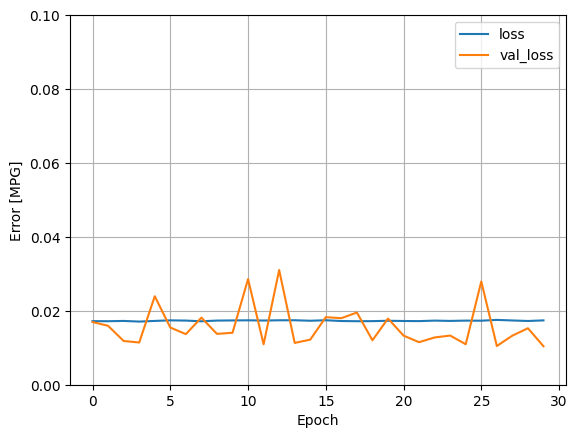

In [508]:
plot_loss(history)

In [509]:
#Collect results on test set for later
test_results = {}

test_results['construction_model'] = construction_model.evaluate(
    test_features['descriptor_Noise: Construction Before/After Hours (NM1)'],
    test_labels, verbose=1)

13750/13750 [==============================] - 6s 444us/step - loss: 0.0104


Linear Regression with Multiple Inputs

In [514]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [515]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 97ms/step


array([[ 0.8199338 ],
       [-1.5362314 ],
       [-0.9670268 ],
       [-0.13797906],
       [-0.13797906],
       [ 0.02179059],
       [-0.13797906],
       [-1.5362314 ],
       [ 0.02179059],
       [-0.13797906]], dtype=float32)

In [517]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [519]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=30,
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/30
43999/43999 [==============================] - 25s 557us/step - loss: 0.2473 - val_loss: 0.3051
Epoch 2/30
43999/43999 [==============================] - 24s 552us/step - loss: 0.2493 - val_loss: 0.1784
Epoch 3/30
43999/43999 [==============================] - 24s 548us/step - loss: 0.2451 - val_loss: 0.2272
Epoch 4/30
43999/43999 [==============================] - 24s 555us/step - loss: 0.2498 - val_loss: 0.2109
Epoch 5/30
43999/43999 [==============================] - 24s 544us/step - loss: 0.2468 - val_loss: 0.1843
Epoch 6/30
43999/43999 [==============================] - 24s 546us/step - loss: 0.2493 - val_loss: 0.2941
Epoch 7/30
43999/43999 [==============================] - 24s 551us/step - loss: 0.2467 - val_loss: 0.2915
Epoch 8/30
43999/43999 [==============================] - 24s 553us/step - loss: 0.2491 - val_loss: 0.2493
Epoch 9/30
43999/43999 [==============================] - 24s 549us/step - loss: 0.2447 - val_loss: 0.3606
Epoch 10/30
43999/43999 [============

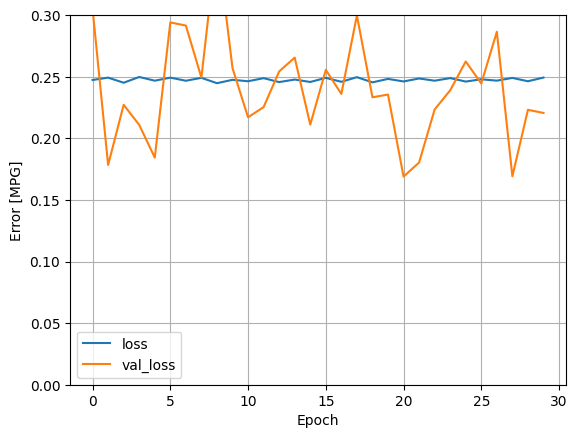

In [522]:
plot_loss(history)

In [526]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

Regression with a deep neural network (DNN)

Implement single-input and multiple-input DNN models.

In [532]:
def build_and_compile_model(norm):
    model = Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [533]:
#Regression using a DNN and a single input
#Create a DNN model with only 'Construction as input 
#and construction_normalizer (defined earlier) as the normalization layer:

In [534]:
dnn_construction_model = build_and_compile_model(construction_normalizer)

In [536]:
dnn_construction_model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_49 (Dense)            (None, 64)                128       
                                                                 
 dense_50 (Dense)            (None, 64)                4160      
                                                                 
 dense_51 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [539]:
%%time
history = dnn_construction_model.fit(
    train_features['descriptor_Noise: Construction Before/After Hours (NM1)'],
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=30)

Epoch 1/30


/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


43999/43999 [==============================] - 29s 657us/step - loss: 0.0153 - val_loss: 0.0121
Epoch 2/30
43999/43999 [==============================] - 29s 655us/step - loss: 0.0114 - val_loss: 0.0107
Epoch 3/30
43999/43999 [==============================] - 29s 666us/step - loss: 0.0112 - val_loss: 0.0155
Epoch 4/30
43999/43999 [==============================] - 32s 722us/step - loss: 0.0109 - val_loss: 0.0140
Epoch 5/30
43999/43999 [==============================] - 29s 659us/step - loss: 0.0108 - val_loss: 0.0107
Epoch 6/30
43999/43999 [==============================] - 31s 695us/step - loss: 0.0106 - val_loss: 0.0101
Epoch 7/30
43999/43999 [==============================] - 31s 701us/step - loss: 0.0104 - val_loss: 0.0095
Epoch 8/30
43999/43999 [==============================] - 31s 697us/step - loss: 0.0103 - val_loss: 0.0097
Epoch 9/30
43999/43999 [==============================] - 29s 658us/step - loss: 0.0102 - val_loss: 0.0102
Epoch 10/30
43999/43999 [=======================

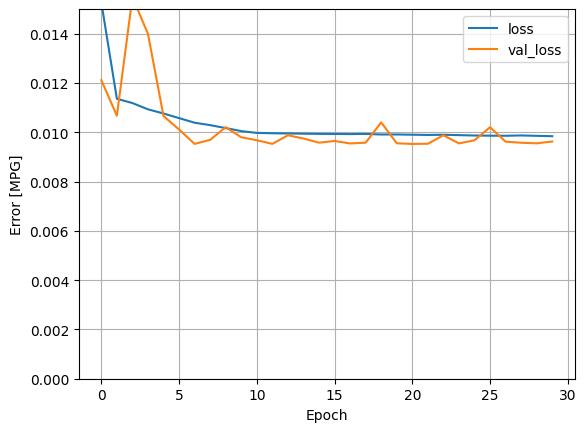

In [542]:
plot_loss(history)

In [545]:
test_results['dnn_construction_model'] = dnn_construction_model.evaluate(
    test_features['descriptor_Noise: Construction Before/After Hours (NM1)'], test_labels,
    verbose=1)

13750/13750 [==============================] - 7s 474us/step - loss: 0.0096


In [ ]:
#Regression using a DNN and multiple inputs
#Same as above with all inputs

In [546]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 34)               69        
 n)                                                              
                                                                 
 dense_52 (Dense)            (None, 64)                2240      
                                                                 
 dense_53 (Dense)            (None, 64)                4160      
                                                                 
 dense_54 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,534
Trainable params: 6,465
Non-trainable params: 69
_________________________________________________________________


In [547]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=30)

Epoch 1/30
43999/43999 [==============================] - 31s 700us/step - loss: 0.0201 - val_loss: 0.0120
Epoch 2/30
43999/43999 [==============================] - 30s 687us/step - loss: 0.0132 - val_loss: 0.0126
Epoch 3/30
43999/43999 [==============================] - 29s 665us/step - loss: 0.0119 - val_loss: 0.0114
Epoch 4/30
43999/43999 [==============================] - 30s 687us/step - loss: 0.0111 - val_loss: 0.0114
Epoch 5/30
43999/43999 [==============================] - 34s 780us/step - loss: 0.0106 - val_loss: 0.0096
Epoch 6/30
43999/43999 [==============================] - 34s 781us/step - loss: 0.0099 - val_loss: 0.0098
Epoch 7/30
43999/43999 [==============================] - 36s 825us/step - loss: 0.0098 - val_loss: 0.0093
Epoch 8/30
43999/43999 [==============================] - 31s 700us/step - loss: 0.0098 - val_loss: 0.0094
Epoch 9/30
43999/43999 [==============================] - 32s 734us/step - loss: 0.0098 - val_loss: 0.0093
Epoch 10/30
43999/43999 [============

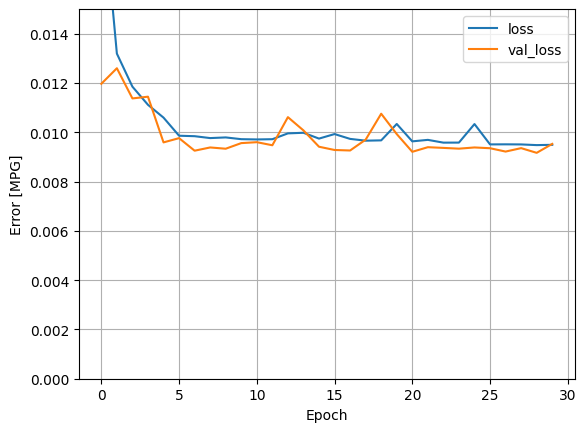

In [548]:
plot_loss(history)

In [549]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [551]:
pd.DataFrame(test_results, index=['Mean absolute error [Price]']).T

,Mean absolute error [Price]
construction_model,0.010386
linear_model,0.218589
dnn_construction_model,0.009604
dnn_model,0.009513


In [555]:
test_predictions = dnn_model.predict(test_features).flatten()

13750/13750 [==============================] - 6s 443us/step


In [556]:
test_predictions

array([3.2020476, 3.2020476, 3.2075162, ..., 3.2020476, 3.2020476,
       3.2075162], dtype=float32)

In [603]:
# Import the inverse Box-Cox and reverse transform to get predictions
from scipy.special import inv_boxcox


In [610]:
test_predictions_inv = inv_boxcox(test_predictions, lam)

In [ ]:
#Coming to conclusion that data is too skewed for any kind of multi class model.... 

In [630]:
pd.DataFrame(test_predictions_inv).describe()

,0
count,439990.000000
mean,483425.312500
std,160615.812500
min,14.937654
25%,402103.875000
50%,402103.875000
75%,440415.750000
max,957058.500000


In [614]:
test_labels_inv = inv_boxcox(test_labels, lam)

In [631]:
pd.DataFrame(test_labels_inv).describe()

,price_transformed
count,4.399900e+05
mean,7.556935e+05
std,7.185230e+05
min,1.381628e+05
25%,3.454377e+05
50%,5.125945e+05
75%,9.401560e+05
max,5.171098e+06


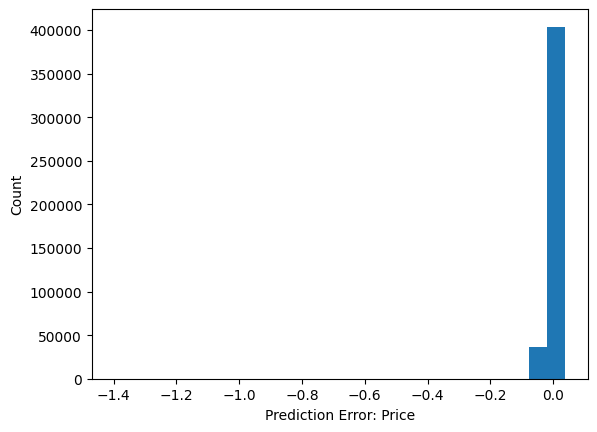

In [636]:
#Error distribution with transformed predictions
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error: Price')
_ = plt.ylabel('Count')

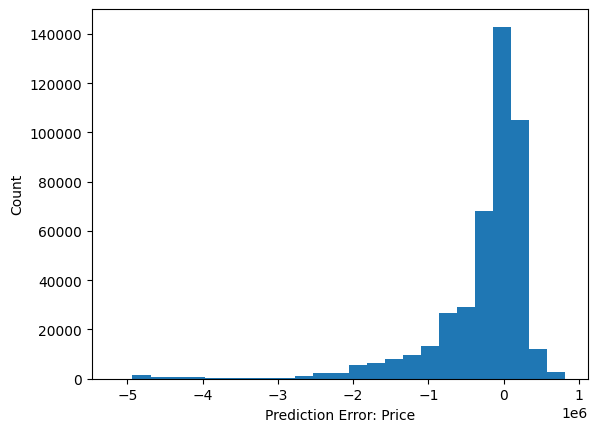

In [638]:
#Error distribution with inverse transformed predictions
error = test_predictions_inv - test_labels_inv
plt.hist(error, bins=25)
plt.xlabel('Prediction Error: Price')
_ = plt.ylabel('Count')

#Negatively skewed distribution of errors, so the model is underestimating prices

Run a binary sequential model

In [757]:
b = df.copy()

In [758]:
b

,Unnamed: 0,descriptor,complaint_type,zipyear,ppu,price_transformed,multi,multi_transformed
0,0,Loud Music/Party,Noise - Residential,104632016,3.407297e+05,3.198785,1,1
1,1,Loud Music/Party,Noise - Residential,100402016,5.457485e+05,3.207647,3,3
2,2,Loud Talking,Noise - Residential,100122016,3.715735e+06,3.233015,4,4
3,3,Loud Music/Party,Noise - Residential,111042016,3.813583e+05,3.201022,2,2
4,4,Loud Music/Party,Noise - Residential,100322016,5.006615e+05,3.206119,2,2
...,...,...,...,...,...,...,...,...
2199944,445752,Loud Music/Party,Noise - Residential,104582017,2.442623e+05,3.191706,1,1
2199945,445753,Loud Music/Party,Noise - Residential,116912017,3.044278e+05,3.196470,1,1
2199946,445754,Banging/Pounding,Noise - Residential,112142017,4.793599e+05,3.205333,2,2
2199947,445755,Loud Music/Party,Noise - Residential,100402017,5.692389e+05,3.208380,3,3


In [759]:
median_transformed = b['price_transformed'].median()

In [760]:
median_transformed

3.2065406515961303

In [761]:
median = b['ppu'].median()

In [762]:
median

512594.4991957612

In [763]:
b['median'] = [1 if x >= median else 0 for x in b['ppu']]

In [764]:
b['median_transformed'] = [1 if x >= median_transformed else 0 for x in b['price_transformed']]

In [765]:
b

,Unnamed: 0,descriptor,complaint_type,zipyear,ppu,price_transformed,multi,multi_transformed,median,median_transformed
0,0,Loud Music/Party,Noise - Residential,104632016,3.407297e+05,3.198785,1,1,0,0
1,1,Loud Music/Party,Noise - Residential,100402016,5.457485e+05,3.207647,3,3,1,1
2,2,Loud Talking,Noise - Residential,100122016,3.715735e+06,3.233015,4,4,1,1
3,3,Loud Music/Party,Noise - Residential,111042016,3.813583e+05,3.201022,2,2,0,0
4,4,Loud Music/Party,Noise - Residential,100322016,5.006615e+05,3.206119,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...
2199944,445752,Loud Music/Party,Noise - Residential,104582017,2.442623e+05,3.191706,1,1,0,0
2199945,445753,Loud Music/Party,Noise - Residential,116912017,3.044278e+05,3.196470,1,1,0,0
2199946,445754,Banging/Pounding,Noise - Residential,112142017,4.793599e+05,3.205333,2,2,0,0
2199947,445755,Loud Music/Party,Noise - Residential,100402017,5.692389e+05,3.208380,3,3,1,1


In [766]:
b.drop(columns=['Unnamed: 0', 'zipyear', 'ppu', 'price_transformed', 'multi', 'multi_transformed', 'median_transformed'], inplace=True)

In [767]:
b.head()

,descriptor,complaint_type,median
0,Loud Music/Party,Noise - Residential,0
1,Loud Music/Party,Noise - Residential,1
2,Loud Talking,Noise - Residential,1
3,Loud Music/Party,Noise - Residential,0
4,Loud Music/Party,Noise - Residential,0


In [768]:
b_dum = pd.get_dummies(b, columns = ['descriptor', 'complaint_type'], drop_first=True)

In [811]:
b_dum.drop(columns = ['median_1_1'], inplace=True)

In [812]:
b_dum.columns

Index(['descriptor_Banging/Pounding', 'descriptor_Car/Truck Horn',
       'descriptor_Car/Truck Music', 'descriptor_Engine Idling',
       'descriptor_Loud Music/Party', 'descriptor_Loud Talking',
       'descriptor_Loud Television', 'descriptor_NYPD',
       'descriptor_News Gathering', 'descriptor_Noise, Barking Dog (NR5)',
       'descriptor_Noise, Ice Cream Truck (NR4)',
       'descriptor_Noise, Other Animals (NR6)',
       'descriptor_Noise:  lawn care equipment (NCL)',
       'descriptor_Noise: Alarms (NR3)',
       'descriptor_Noise: Boat(Engine,Music,Etc) (NR10)',
       'descriptor_Noise: Construction Before/After Hours (NM1)',
       'descriptor_Noise: Construction Equipment (NC1)',
       'descriptor_Noise: Jack Hammering (NC2)',
       'descriptor_Noise: Loud Music/Daytime (Mark Date And Time) (NN1)',
       'descriptor_Noise: Loud Music/Nighttime(Mark Date And Time) (NP1)',
       'descriptor_Noise: Manufacturing Noise (NK1)',
       'descriptor_Noise: Other Noise Sources

In [911]:
X = b_dum.values

In [912]:
Y = b['median']

In [913]:
Y.value_counts(normalize=True)

1    0.504658
0    0.495342
Name: median, dtype: float64

In [914]:
#Run initial train test split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3, random_state=11)

In [915]:
# I want a separate validation set and test set , so I'm splitting val_and_test 
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [916]:
#Check shapes
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1539964, 34) (329992, 34) (329993, 34) (1539964,) (329992,) (329993,)


In [917]:
# # standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2-layer Neural Network

In [825]:
#Create baseline model
model=Sequential()
model.add(Dense(8, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

    
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 8)                 280       
                                                                 
 dense_68 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [826]:
hist = model.fit(X_train, Y_train,
          batch_size=100, epochs=30,
          validation_data=(X_val, Y_val))


Epoch 1/30
15400/15400 [==============================] - 12s 709us/step - loss: 0.6478 - accuracy: 0.6288 - val_loss: 0.6668 - val_accuracy: 0.6176
Epoch 2/30
15400/15400 [==============================] - 11s 717us/step - loss: 0.6464 - accuracy: 0.6292 - val_loss: 0.6671 - val_accuracy: 0.6161
Epoch 3/30
15400/15400 [==============================] - 12s 745us/step - loss: 0.6463 - accuracy: 0.6294 - val_loss: 0.6652 - val_accuracy: 0.6184
Epoch 4/30
15400/15400 [==============================] - 11s 740us/step - loss: 0.6462 - accuracy: 0.6294 - val_loss: 0.6664 - val_accuracy: 0.6169
Epoch 5/30
15400/15400 [==============================] - 11s 702us/step - loss: 0.6462 - accuracy: 0.6295 - val_loss: 0.6666 - val_accuracy: 0.6169
Epoch 6/30
15400/15400 [==============================] - 11s 696us/step - loss: 0.6462 - accuracy: 0.6294 - val_loss: 0.6670 - val_accuracy: 0.6169
Epoch 7/30
15400/15400 [==============================] - 11s 684us/step - loss: 0.6461 - accuracy: 0.6294

In [827]:
model.evaluate(X_test, Y_test)[1]

10313/10313 [==============================] - 5s 491us/step - loss: 0.6466 - accuracy: 0.6289


0.6288921236991882

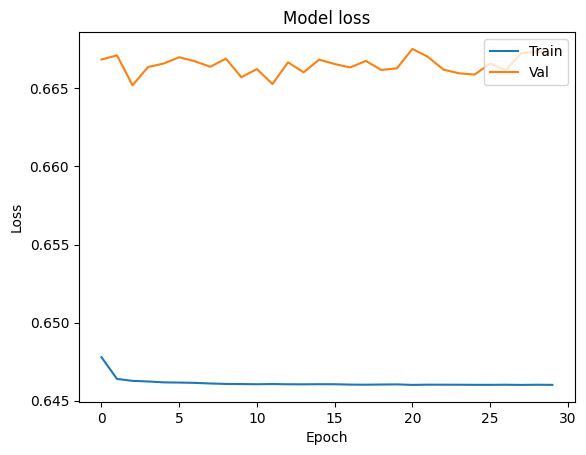

In [828]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [918]:
# Creating a multi-layered Sequential model for binary classification and adding Regularization and Dropout

model_2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(34,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_2.compile(optimizer='adam',                                     
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=100, epochs=30,
          validation_data=(X_val, Y_val),
        callbacks=callbacks)

Epoch 1/30
15400/15400 [==============================] - ETA: 0s - loss: 0.7212 - accuracy: 0.6243
Epoch 1: accuracy improved from 0.35052 to 0.62431, saving model to /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt
INFO:tensorflow:Assets written to: /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt/assets
15400/15400 [==============================] - 787s 51ms/step - loss: 0.7212 - accuracy: 0.6243 - val_loss: 0.7095 - val_accuracy: 0.5683 - lr: 0.0010
Epoch 2/30
15400/15400 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.6247
Epoch 2: accuracy improved from 0.62431 to 0.62470, saving model to /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt
INFO:tensorflow:Assets written to: /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt/assets
15400/15400 [==============================] - 721s 47ms/step - loss:

In [919]:
model_2.evaluate(X_test, Y_test)[1]

10313/10313 [==============================] - 118s 11ms/step - loss: 0.6846 - accuracy: 0.6269


0.626949667930603

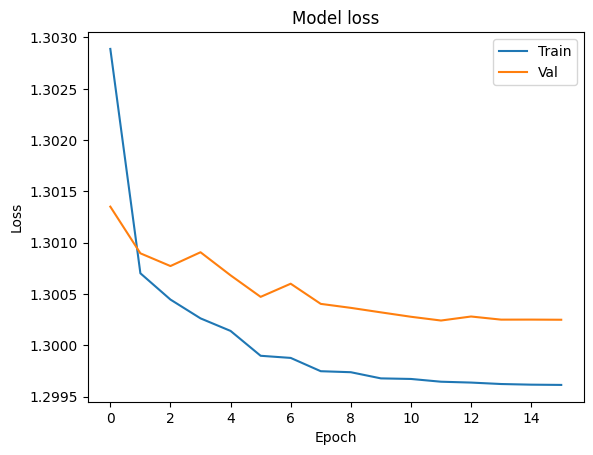

In [920]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

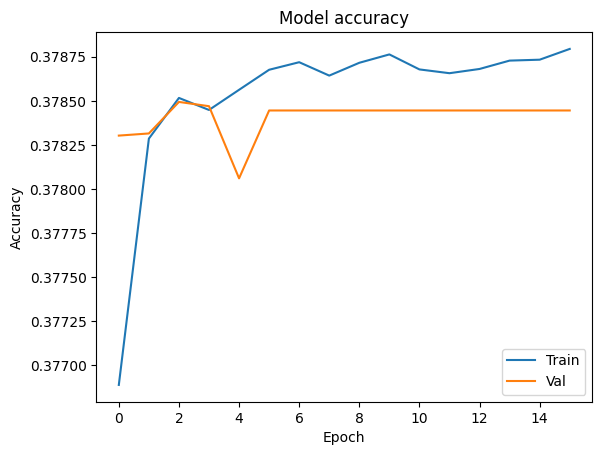

In [921]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [832]:
t = df.copy()

In [833]:
t.drop(columns=['Unnamed: 0'], inplace=True)

In [834]:
dataset=t.values

In [835]:
Y = dataset[:, -1]

In [836]:
#Encode the output variable
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

#One hot encode integers to dummy variables
dummy_y = to_categorical(encoded_Y)


In [837]:
dummy_y

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [841]:
t_dum = pd.get_dummies(t, columns = ['descriptor', 'complaint_type'], drop_first=True)

In [842]:
# Converting target to array and drop non-feature columns
t_dum.drop(columns=['multi',], inplace=True)

In [844]:
t_dum.drop(columns=['zipyear', 'ppu', 'price_transformed', 'multi_transformed',], inplace=True)

In [845]:
t_dum

,descriptor_Banging/Pounding,descriptor_Car/Truck Horn,descriptor_Car/Truck Music,descriptor_Engine Idling,descriptor_Loud Music/Party,descriptor_Loud Talking,descriptor_Loud Television,descriptor_NYPD,descriptor_News Gathering,"descriptor_Noise, Barking Dog (NR5)",...,descriptor_Noise: air condition/ventilation equipment (NV1),descriptor_Other,complaint_type_Noise,complaint_type_Noise - Commercial,complaint_type_Noise - Helicopter,complaint_type_Noise - House of Worship,complaint_type_Noise - Park,complaint_type_Noise - Residential,complaint_type_Noise - Street/Sidewalk,complaint_type_Noise - Vehicle
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199944,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2199945,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2199946,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2199947,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [846]:
X = t_dum.values

In [847]:
X.shape

(2199949, 34)

In [848]:
#Run initial train test split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, dummy_y, test_size=0.3)


In [849]:
# I want a separate validation set and test set , so I'm splitting val_and_test 
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [850]:
#Check shapes
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1539964, 34) (329992, 34) (329993, 34) (1539964, 4) (329992, 4) (329993, 4)


In [851]:
# Make Callbacks
# Stop learning after 4 epochs if the loss value doesn't decrease
earlystop = EarlyStopping(patience=4)

# Reduce the learning rate by monitoring accuracy. If accuracy doesn't increase after 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            factor=0.5, 
                                            min_lr=0.00001)

checkpoint_path = "/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_accuracy',
                                                 verbose = 1,
                                                 save_best_only = True,
                                                 mode = 'max')

callbacks = [earlystop, learning_rate_reduction, cp_callback]

In [853]:
#Create baseline model
model=Sequential()
model.add(Dense(8, input_dim=34, activation='relu'))
model.add(Dense(4, activation='softmax'))
    
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [854]:
hist = model.fit(X_train, Y_train,
          batch_size=100, epochs=30,
          validation_data=(X_val, Y_val),
            callbacks = callbacks)


Epoch 1/30
15368/15400 [============================>.] - ETA: 0s - loss: 1.3029 - accuracy: 0.3769
Epoch 1: val_accuracy improved from -inf to 0.37830, saving model to /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt
INFO:tensorflow:Assets written to: /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt/assets
15400/15400 [==============================] - 34s 2ms/step - loss: 1.3029 - accuracy: 0.3769 - val_loss: 1.3014 - val_accuracy: 0.3783 - lr: 0.0010
Epoch 2/30
15398/15400 [============================>.] - ETA: 0s - loss: 1.3007 - accuracy: 0.3783
Epoch 2: val_accuracy improved from 0.37830 to 0.37832, saving model to /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt
INFO:tensorflow:Assets written to: /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt/assets
15400/15400 [==============================] - 31s 2ms/step - loss

In [855]:
# This isn't looking good! Evaluating on test set
model.evaluate(X_test, Y_test)[1]

10313/10313 [==============================] - 13s 1ms/step - loss: 1.2993 - accuracy: 0.3792


0.3792444169521332

Evaluation of baseline model with pre-transformed Data

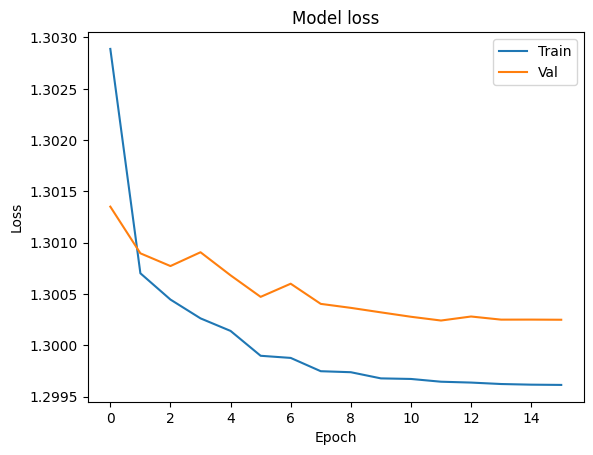

In [856]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

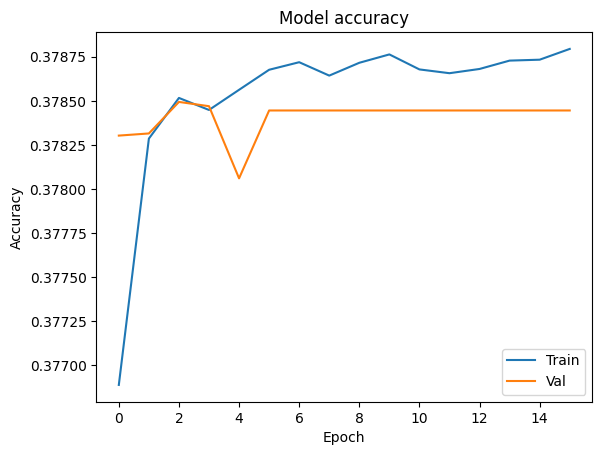

In [857]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#Make dataframe for Test Set confusion matrix

In [858]:
predictions_test = model.predict(X_test)

10313/10313 [==============================] - 13s 1ms/step


In [859]:
y_pred = np.argmax(predictions_test, axis=-1)

In [860]:
Y_test

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [861]:
y_pred

array([3, 1, 3, ..., 0, 2, 1])

In [862]:
#Looks like it's overpredicting the lowest quartile?
unique, counts = np.unique(y_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 171829]
 [     1  21507]
 [     2  56815]
 [     3  79842]]


In [863]:
#Make a new DF with true and predicted labels for confusion matrix
df_test_pred = pd.DataFrame()
df_test_pred['predicted_labels'] = y_pred

In [864]:
# Get true labels from y_test and put them into a single array ("un-dummify them")
y_test_df = pd.DataFrame(Y_test)

y_test_df = y_test_df.idxmax(axis=1)

unique, counts = np.unique(y_test_df , return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 82611]
 [    1 85731]
 [    2 81714]
 [    3 79937]]


In [867]:
df_test_pred['true_labels'] = y_test_df

In [868]:
df_test_pred.head(10)

,predicted_labels,true_labels
0,3,3
1,1,1
2,3,3
3,3,3
4,0,1
5,3,1
6,0,1
7,0,0
8,2,2
9,0,2


In [869]:
print("Test Predicted Labels")
print(df_test_pred['predicted_labels'].value_counts())

print("")

print("Test True Labels")
print(df_test_pred['true_labels'].value_counts())

Test Predicted Labels
0    171829
3     79842
2     56815
1     21507
Name: predicted_labels, dtype: int64

Test True Labels
1    85731
0    82611
2    81714
3    79937
Name: true_labels, dtype: int64


In [870]:
#Make dataframe for Train Set confusion matrix

In [871]:
predictions_train = model.predict(X_train)

48124/48124 [==============================] - 55s 1ms/step


In [872]:
y_pred_train = np.argmax(predictions_train, axis=-1)

unique, counts = np.unique(y_pred_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 802735]
 [     1 101211]
 [     2 263269]
 [     3 372749]]


In [873]:
#Make a new DF with true and predicted labels for confusion matrix
df_train_pred = pd.DataFrame()
df_train_pred['predicted_labels'] = y_pred_train

In [874]:
# Get true labels from y_train and put them into a single array ("un-dummify them")
y_train_df = pd.DataFrame(Y_train)

y_train_df = y_train_df.idxmax(axis=1)

unique, counts = np.unique(y_train_df , return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 386042]
 [     1 399915]
 [     2 381188]
 [     3 372819]]


In [875]:
df_train_pred['true_labels'] = y_train_df

In [876]:
print("Train Predicted Labels")
print(df_train_pred['predicted_labels'].value_counts())

print("")

print("Train True Labels")
print(df_train_pred['true_labels'].value_counts())

Train Predicted Labels
0    802735
3    372749
2    263269
1    101211
Name: predicted_labels, dtype: int64

Train True Labels
1    399915
0    386042
2    381188
3    372819
Name: true_labels, dtype: int64


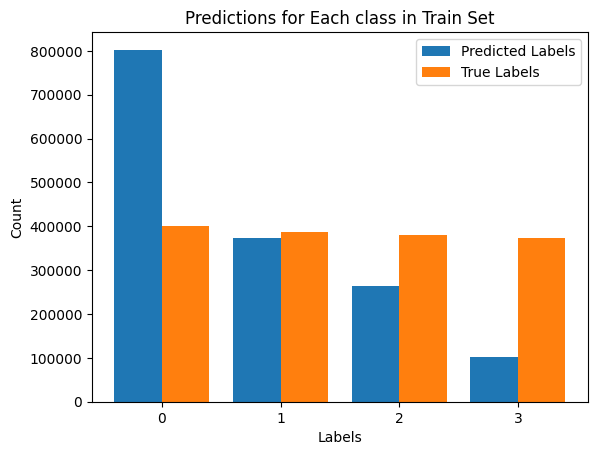

In [878]:
X = range(4)

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, df_train_pred['predicted_labels'].value_counts(), 0.4, label = 'Predicted Labels')
plt.bar(X_axis + 0.2, df_train_pred['true_labels'].value_counts(), 0.4, label = 'True Labels')
  
plt.xticks(X_axis, X)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Predictions for Each class in Train Set")
plt.legend()
plt.show()

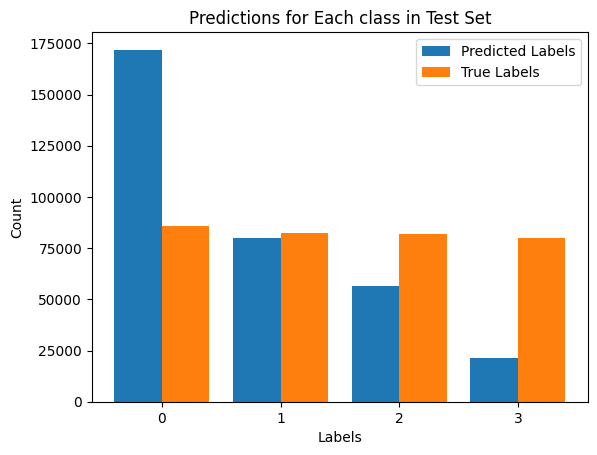

In [371]:
X = range(4)

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, df_test_pred['predicted_labels'].value_counts(), 0.4, label = 'Predicted Labels')
plt.bar(X_axis + 0.2, df_test_pred['true_labels'].value_counts(), 0.4, label = 'True Labels')
  
plt.xticks(X_axis, X)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Predictions for Each class in Test Set")
plt.legend()
plt.show()

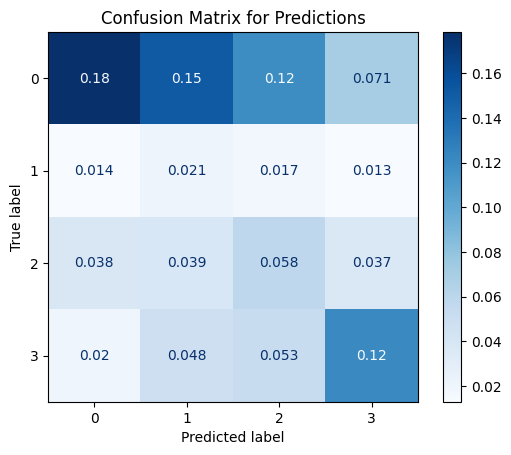

In [879]:
ConfusionMatrixDisplay.from_predictions(df_test_pred['predicted_labels'], 
                                        df_test_pred['true_labels'], cmap='Blues', normalize='all')

       
plt.title("Confusion Matrix for Predictions")
plt.show()

In [ ]:
# Look at classification report and AUC/ROC for predictions

In [880]:
df_test_pred

,predicted_labels,true_labels
0,3,3
1,1,1
2,3,3
3,3,3
4,0,1
...,...,...
329988,0,2
329989,1,3
329990,0,1
329991,2,3


In [881]:
print(classification_report(df_test_pred['true_labels'], df_test_pred['predicted_labels'], 
                            labels = [0,1,2,3], digits=4))

              precision    recall  f1-score   support

           0     0.3427    0.7129    0.4629     82611
           1     0.3281    0.0823    0.1316     85731
           2     0.3393    0.2359    0.2783     81714
           3     0.5000    0.4994    0.4997     79937

    accuracy                         0.3792    329993
   macro avg     0.3775    0.3826    0.3431    329993
weighted avg     0.3762    0.3792    0.3400    329993



In [890]:
# Make Callbacks
# Stop learning after 10 epochs if the loss value doesn't decrease
earlystop = EarlyStopping(patience=4)

# Reduce the learning rate by monitoring accuracy. If accuracy doesn't increase after 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=2, 
                                            factor=0.5, 
                                            min_lr=0.00001)

checkpoint_path = "/Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='accuracy',
                                                 verbose = 1,
                                                 save_best_only = True,
                                                 mode = 'max')

callbacks = [earlystop, learning_rate_reduction, cp_callback]

In [891]:
from keras.layers import Dropout
from keras import regularizers

In [892]:
# Creating a bigger Sequential model and adding Regularization and Dropout

model_2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(34,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(4, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])


In [893]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [894]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=100, epochs=20,
          validation_data=(X_val, Y_val),
            callbacks = callbacks)

Epoch 1/20
15399/15400 [============================>.] - ETA: 0s - loss: 1.4142 - accuracy: 0.3484
Epoch 1: accuracy improved from -inf to 0.34845, saving model to /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt
INFO:tensorflow:Assets written to: /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt/assets
15400/15400 [==============================] - 759s 49ms/step - loss: 1.4142 - accuracy: 0.3484 - val_loss: 1.3799 - val_accuracy: 0.3553 - lr: 0.0010
Epoch 2/20
15399/15400 [============================>.] - ETA: 0s - loss: 1.3817 - accuracy: 0.3493
Epoch 2: accuracy improved from 0.34845 to 0.34926, saving model to /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt
INFO:tensorflow:Assets written to: /Users/ksalmon/Desktop/GA/DSI20-lessons/projects/GA files/tf-multiclass-callbacks/cp.ckpt/assets
15400/15400 [==============================] - 747s 49ms/step - loss: 1.

In [895]:
model_2.evaluate(X_test, Y_test)[1]



10313/10313 [==============================] - 121s 12ms/step - loss: 1.3733 - accuracy: 0.3541


0.354143887758255

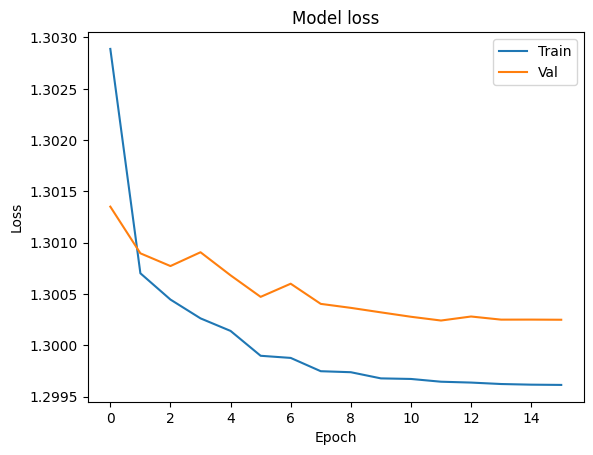

In [896]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

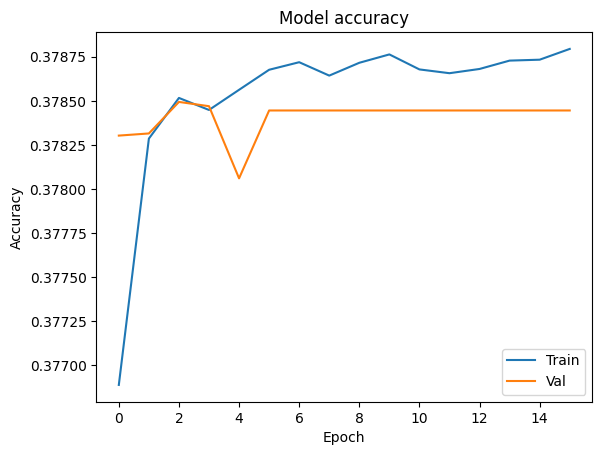

In [897]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [898]:
predictions_test = model_2.predict(X_test)

10313/10313 [==============================] - 120s 12ms/step


In [905]:
predictions_test

array([[0.3183497 , 0.4593279 , 0.51493233, 0.7035148 ],
       [0.3907606 , 0.4841065 , 0.5118093 , 0.61306244],
       [0.3183497 , 0.4593279 , 0.51493233, 0.7035148 ],
       ...,
       [0.5447464 , 0.5329244 , 0.5056683 , 0.4173474 ],
       [0.49900562, 0.5185868 , 0.5074751 , 0.47498778],
       [0.5351106 , 0.5298962 , 0.50605035, 0.4294031 ]], dtype=float32)

In [899]:
y_pred = np.argmax(predictions_test, axis=-1)

In [900]:
#Looks like it's overpredicting the lowest quartile?
unique, counts = np.unique(y_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 170885]
 [     1  52398]
 [     3 106710]]


In [906]:
#Make a new DF with true and predicted labels for confusion matrix
df_test_pred = pd.DataFrame()
df_test_pred['predicted_labels'] = y_pred

In [907]:
# Get true labels from y_train and put them into a single array ("un-dummify them")
y_train_df = pd.DataFrame(Y_train)

y_train_df = y_train_df.idxmax(axis=1)

unique, counts = np.unique(y_train_df , return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 386042]
 [     1 399915]
 [     2 381188]
 [     3 372819]]


In [908]:
df_test_pred['true_labels'] = y_train_df

In [910]:
df_test_pred['predicted_labels'].value_counts()

0    170885
3    106710
1     52398
Name: predicted_labels, dtype: int64

In [ ]:
# I gave up on the big model above at 7 epochs because the scores stopped improving after the 3rd
#and they were worst than my baseline model

#The scores stopped improving here:
#loss: 0.5622 - accuracy: 0.2597 - val_loss: 0.5623 - val_accuracy: 0.2594

In [ ]:
# Try a KerasClassifier with k-folds

In [263]:
# use the same baseline model
def baseline_model():
     # create model
    model = Sequential()
    model.add(Dense(8, input_dim=34, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=1000, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/Users/ksalmon/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/Use

Baseline: 37.90% (0.13%)


To do:
Run baseline model with k-folds and keras classifier (pursue that if things seem to improve)
Extract confusion matrix from best model and train model
Get ROC/AUC curves and play with threshold to see if I can bring down False Positives for 0 class


Run a big binary sequential model
run a regression model with XGBoost?
run a binary model with XGboost
Run a multiclass model with XGboost


Then:
Revisit spacy and toxic comments
run a tensorflow model for toxic comments

Put together presentation